To "pull yourself up by your bootstraps" is a classic idiom meaning that you achieve a difficult task by yourself with no help at all. In statistical inference, you want to know what would happen if you could repeat your data acquisition an infinite number of times. This task is impossible, but can we use only the data we actually have to get close to the same result as an infinitude of experiments? The answer is yes! The technique to do it is aptly called bootstrapping. This chapter will introduce you to this extraordinarily powerful tool.



# Resampling Array

resampling array is used to create a data to use for multiple experiment because re conducting experiment is takes a lot of time

<h3>Bootstraping</h3>
<li>The use of resample data to perform statistical inference</li>

<h3>Bootstrap Sample</h3>
<li>Resample array of data</li>

In [2]:
import numpy as np

test = np.random.choice([1,2,3,4,5], size=5)

#mean
np.mean(test)

#median
np.median(test)

#standard deviation
np.std(test)

1.16619037896906

<h2>Getting the terminology down</h2><br>
Getting tripped up over terminology is a common cause of frustration in students. Unfortunately, you often will read and hear other data scientists using different terminology for bootstrap samples and replicates. This is even more reason why we need everything to be clear and consistent for this course. So, before going forward discussing bootstrapping, let's get our terminology down. If we have a data set with  repeated measurements, a bootstrap sample is an array of length  that was drawn from the original data with replacement. What is a bootstrap replicate?


<h3>Possible Answers</h3>
<li>Just another name for a bootstrap sample.</li>
<li><b>A single value of a statistic computed from a bootstrap sample.</b></li>
<li>An actual repeat of the measurements.</li>


<h4>Exercise</h4>
<h2>Bootstrapping by hand</h2>
To help you gain intuition about how bootstrapping works, imagine you have a data set that has only three points, [-1, 0, 1]. How many unique bootstrap samples can be drawn (e.g., [-1, 0, 1] and [1, 0, -1] are unique), and what is the maximum mean you can get from a bootstrap sample? It might be useful to jot down the samples on a piece of paper.

(These are too few data to get meaningful results from bootstrap procedures, but this example is useful for intuition.)

<h4>Instructions</h4>
<h3>Possible Answers</h3>

<ul>
    <li>There are 10 unique samples, and the maximum mean is 1.</li>
    <li>There are 10 unique samples, and the maximum mean is 0.</li>
    <li>There are 3 unique samples, and the maximum mean is 0.</li>
    <li>There are 27 unique samples, and the maximum mean is 0.</li>
    <li><b>There are 27 unique samples, and the maximum mean is 1.</b></li>
</ul>

<b>Correct! There are 27 total bootstrap samples, and one of them, [1,1,1] has a mean of 1. Conversely, 7 of them have a mean of zero.</b>

<h4>Exercise</h4>
<h2>Visualizing bootstrap samples</h2>
In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.


<h4>Instruction</h4>
<ul>
    <li>Write a for loop to acquire 50 bootstrap samples of the rainfall data and plot their ECDF.</li>
    <ul>
         <li>Use np.random.choice() to generate a bootstrap sample from the NumPy array rainfall. Be sure that the size of the resampled array is len(rainfall).</li>
        <li>Use the function ecdf() that you wrote in the prequel to this course to generate the x and y values for the ECDF of the bootstrap sample bs_sample.</li>
        <li>Plot the ECDF values. Specify color='gray' (to make gray dots) and alpha=0.1 (to make them semi-transparent, since we are overlaying so many) in addition to the marker='.' and linestyle='none' keyword arguments.</li>
    </ul>
    <li>Use ecdf() to generate x and y values for the ECDF of the original rainfall data available in the array rainfall.
Plot the ECDF values of the original data.</li>
</ul>

In [4]:
rainfall = [ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,  878.8,  865.6,
  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,  752.1,  837.2,  710.6,  749.2,
  967.1,  701.2,  619. ,  747.6,  803.4,  645.6,  804.1,  787.4,  646.8,  997.1,
  774. ,  734.5,  835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
  883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,  927.9,  809.4,
  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,  936.3,  765.4,  882.1,  681.1,
  661.3,  847.9,  683.9,  985.7,  771.1,  736.6,  713.2,  774.5,  937.7,  694.5,
  598.2,  983.8,  700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
  736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,  770.4,  808.6,
  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,  960.4,  877.8,  940.6,  831.8,
  906.2,  866.5,  674.1,  998.1,  789.3,  915. ,  737.1,  763. ,  666.7,  824.5,
  913.8,  905.1,  667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
  595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,  572.4, 1146.4,
  728.2,  864.2,  793. ]

# Import ecdf from module 1

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

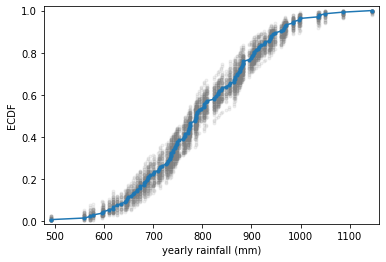

In [8]:
import matplotlib.pyplot as plt


for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

<b>Good job! Notice how the bootstrap samples give an idea of how the distribution of rainfalls is spread.</b>

# Bootstrap confidence intervals

In [10]:
from pathlib import Path
import pandas as pd

data = Path('../data/')
michelson_speed_of_light = data / 'michelson_speed_of_light.csv'

df = pd.read_csv(michelson_speed_of_light)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns = df.columns.str.strip()
df.head(2)

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles


In [12]:
michelson_speed_of_light = df["velocity of light in air (km/s)"]

In [13]:
def bootstrap_replicate1(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)


bootstrap_replicate1(michelson_speed_of_light, np.mean)

299861.9

In [14]:
bootstrap_replicate1(michelson_speed_of_light, np.mean)

299853.2

In [15]:
bootstrap_replicate1(michelson_speed_of_light, np.mean)

299849.0

# Many bootstrap Replicate

instead do replicate one by one we can just using for

In [17]:
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate1(michelson_speed_of_light, np.mean)

# Plotting Histogram of bootstrap replicate 

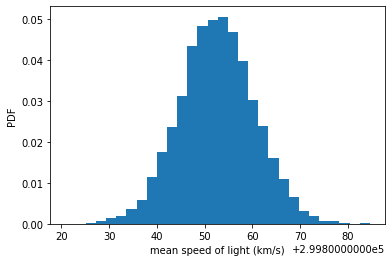

In [21]:
_ = plt.hist(bs_replicates, bins=30, density=True)
_ = plt.xlabel("mean speed of light (km/s)")
_ = plt.ylabel("PDF")
_ = plt.show()

## Convidence Interval of statistic

<li>if we repeated measured over and over again, p% of the observe value will lie within p% convidence interval</li>

Examples:<br>

In [23]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([299837.2975, 299868.    ])

<h4>Exercise</h4>
<h2>Generating many bootstrap replicates</h2>

The function bootstrap_replicate_1d() from the video is available in your namespace. Now you'll write another function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

For your reference, the bootstrap_replicate_1d() function is provided below:

<code>
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
</code>


<h4>Instruction</h4>
<ul>
    <li>Define a function with call signature draw_bs_reps(data, func, size=1).</li>
    <ul>
        <li>Using np.empty(), initialize an array called bs_replicates of size size to hold all of the bootstrap replicates.</li>
        <li>Write a for loop that ranges over size and computes a replicate using bootstrap_replicate_1d(). Refer to the exercise description above to see the function signature of bootstrap_replicate_1d(). Store the replicate in the appropriate index of bs_replicates.</li>
        <li>Return the array of replicates bs_replicates. This has already been done for you.</li>
    </ul>
</ul>

In [51]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
    
        bs_replicates[i] = bootstrap_replicate1(data, func)

    return bs_replicates


<b>Good job! This function will be a workhorse for you!</b>

<h4>Exercise</h4>

<h2>Generating many bootstrap replicates</h2>
The function bootstrap_replicate_1d() from the video is available in your namespace. Now you'll write another function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

For your reference, the bootstrap_replicate_1d() function is provided below:

<code>def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)</code>

<h4>Instruction</h4>
<ul>
    <li>Define a function with call signature draw_bs_reps(data, func, size=1).</li>
    <ul>
        <li>Using np.empty(), initialize an array called bs_replicates of size size to hold all of the bootstrap replicates.</li>
        <li>Write a for loop that ranges over size and computes a replicate using bootstrap_replicate_1d(). Refer to the exercise description above to see the function signature of bootstrap_replicate_1d(). Store the replicate in the appropriate index of bs_replicates.</li>
        <li>Return the array of replicates bs_replicates. This has already been done for you.</li>
    </ul>
</ul>




10.510549150506188
10.505857518260118


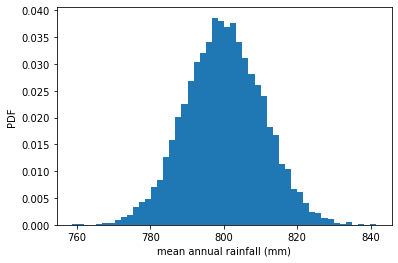

In [32]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

<b>Great work! Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.</b>

<h4>Exercise</h4>

<h2>Confidence intervals of rainfall data</h2>

A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates. What is the 95% confidence interval?

<h4>Instruction</h4>
<ul>
    <li>Possible Answers</li>
    <ul>
        <li>(765, 776) mm/year</li>
        <li><b>(780, 821) mm/year</b></li>
         <li>(761, 817) mm/year</li>
         <li>(761, 841) mm/year</li>  
    </ul>
</ul>


In [41]:
np.percentile(bs_replicates, [2.5, 97.5])

array([662.62121514, 869.362251  ])

<b>Correct! See, it's simple to get confidence intervals using bootstrap!

</b>

<h4>Exercise</h4>

<h2>Bootstrap replicates of other statistics</h2>

We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

Here, you will make use of the draw_bs_reps() function you defined a few exercises ago. It is provided below for your reference:

<code>def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates</code>

<h4>Instruction</h4>
<ul>
    <li>Draw 10000 bootstrap replicates of the variance in annual rainfall, stored in the rainfall dataset, using your draw_bs_reps() function. Hint: Pass in np.var for computing the variance.</li>
    <li>Divide your variance replicates (bs_replicates) by 100 to put the variance in units of square centimeters for convenience.</li>
    <li>Make a histogram of bs_replicates using the normed=True keyword argument and 50 bins.</li>
</ul>


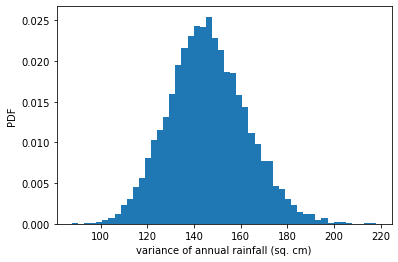

In [36]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

<b>Great work! This is not normally distributed, as it has a longer tail to the right. Note that you can also compute a confidence interval on the variance, or any other statistic, using np.percentile() with your bootstrap replicates.</b>

<h4>Exercise</h4>

<h2>Confidence interval on the rate of no-hitters</h2>
Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter . Plot a histogram of your replicates and report a 95% confidence interval.



<h4>Instruction</h4>
<ul>
    <li>Generate 10000 bootstrap replicates of  from the nohitter_times data using your draw_bs_reps() function. Recall that the optimal  is calculated as the mean of the data.</li>
    <li>Compute the 95% confidence interval using np.percentile() and passing in two arguments: The array bs_replicates, and the list of percentiles - in this case 2.5 and 97.5.</li>
    <li>Print the confidence interval.</li>
    <li>Plot a histogram of your bootstrap replicates. This has been done for you, so hit 'Submit Answer' to see the plot!</li>

</ul>


In [38]:
nohitter_times = [ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,  966,  624,
   29,  450,  107,   20,   91, 1325,  124, 1468,  104, 1309,  429,   62, 1878, 1104,
  123,  251,   93,  188,  983,  166,   96,  702,   23,  524,   26,  299,   59,   39,
   12,    2,  308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665, 1084,
 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
 2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,   73,  603,  233,
  255,  528,  397, 1529, 1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,
  224,  219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,  176, 2199,
  216,   54,  675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,  136,
   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,  605,  539, 1491,  323,
  240,  179,  702,  156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
  576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,
  100, 2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,  206,  660,
  242,  577,  179,  157,  192,  192, 1848,  792, 1693,   55,  388,  225, 1134, 1172,
 1555,   31, 1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745, 2491,
  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
  391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,  603, 1349,  162,
 1027,  783,  326,  101,  876,  381,  905,  156,  419,  239,  119,  129,  467]

95% confidence interval = [662.62121514 869.362251  ] games


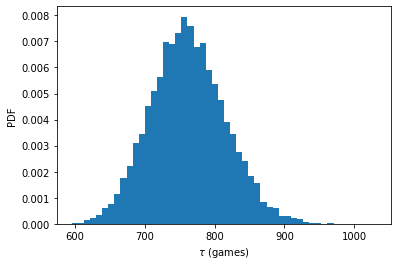

In [40]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


<b>This gives you an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

</b>

<h3>Pairs bootstrap</h3>

<h2>nonparametic Interface</h2>
<li>make no assumption about the model and probability distribution underliying the data</li>


when we perform linear least squere regression, we using linear model, test 2 parameter the slope and interface. this is parametric estimate

<h3>Pair bootstrap for linear regression</h3>
<li>Resample data in Pair</li>
<li>Compute slope and intercept from resample data</li>
<li>Each slope and intercept is a bootstrap replicate</li>
<li>Compute confidence intervals from percentiles of bootstrap replicate</li>


<h3>Generating a pair of bootstrap sample</h3>
<code>np.arange(7)
array([0, 1, 2, 3, 4, 5, 6])</code>
<br>
<code>
   ins = np.arange(len(total_votes))
   bs_ins = np.random.choice(ins, len(ins))
   bs_total_votes = total_votes[bs_ins]
   bs_dem_share = dem_share[bs_ins]
</code>

<h3>Computing a pair bootstrap replicate</h3>
<code>bs_slope, bs_interface = np.polyfit(bs_total_votes, bs_dem_share, 1)</code>
<br>
<br>
<code>np.polyfit(total_votes, dem_share, 1)</code>#fit of original

<h4>2008 US swing state election Result Example:</h4>(Related to non parametic interface)

In [47]:
#reserve for latter

elections_all_file = data / '2008_all_states.csv'
elections_swing_file = data / '2008_swing_states.csv'

elections_all_file_df = pd.read_csv(elections_all_file)
elections_all_file_df.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [49]:
elections_swing_file_df = pd.read_csv(elections_swing_file)
elections_swing_file_df.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


what i need to do is how to:<br>
show elections_all_file and elections_swing_file in linear graph not distribution graph

<h4>Exercise</h4>

<h2>A function to do pairs bootstrap</h2>

As discussed in the video, pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using np.polyfit(). We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.


<h4>Instruction</h4>
<ul>
    <li>Use np.arange() to set up an array of indices going from 0 to len(x). These are what you will resample and use them to pick values out of the x and y arrays.</li>
    <li>Use np.empty() to initialize the slope and intercept replicate arrays to be of size size.</li>
    <li>Write a for loop to:</li>
    <ul>
        <li>Resample the indices inds. Use np.random.choice() to do this</li>
        <li>Make new  and  arrays bs_x and bs_y using the the resampled indices bs_inds. To do this, slice x and y with bs_inds.</li>
         <li>Use np.polyfit() on the new  and  arrays and store the computed slope and intercept.</li>
    </ul>
    <li>Return the pair bootstrap replicates of the slope and intercept.</li>
</ul>

In [50]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.random.choice(inds, len(inds))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.polyfit(x, deg=1)
    bs_intercept_reps = np.polyfit(y, deg=1)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=size)
        bs_x, bs_y = x[bs_slope_reps], y[bs_intercept_reps]
        bs_slope_reps[i], bs_intercept_reps[i] = bs_x, bs_y

    return bs_slope_reps, bs_intercept_reps


<h3>the problem i faced:</h3><br>
i didn't know how to Initialize replicates: bs_slope_reps, bs_intercept_reps individually
<br><br>
In Generate Replica Section <br>
i didnt know bs_x, bs_y = x[], y[] what will be used for parameter in x and y


<h4>Exercise</h4>

<h2>Pairs bootstrap of literacy/fertility data</h2><br>

Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays illiteracy and fertility.

As a reminder, draw_bs_pairs_linreg() has a function signature of draw_bs_pairs_linreg(x, y, size=1), and it returns two values: bs_slope_reps and bs_intercept_reps.



<h4>Instruction</h4>
<ul>
    <li>Use your draw_bs_pairs_linreg() function to take 1000 bootstrap replicates of the slope and intercept. The x-axis data is illiteracy and y-axis data is fertility.</li>
    <li>Compute and print the 95% bootstrap confidence interval for the slope.</li>
    <li>Plot and show a histogram of the slope replicates. Be sure to label your axes. This has been done for you, so click 'Submit Answer' to see your histogram!</li>
</ul>







<h3>Non Parametic Interface</h3>

make no assumption about the model or probability distribution underlying the data

<h4>Exercise</h4>

<h2>Plotting bootstrap regressions</h2>

A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as bs_slope_reps and bs_intercept_reps).


<h4>Instruction</h4>
<ul>
    <li>Generate an array of -values consisting of 0 and 100 for the plot of the regression lines. Use the np.array() function for this.</li>
    <li>Write a for loop in which you plot a regression line with a slope and intercept given by the pairs bootstrap replicates. Do this for 100 lines.</li>
    <ul>
        <li>When plotting the regression lines in each iteration of the for loop, recall the regression equation y = a*x + b. Here, a is bs_slope_reps[i] and b is bs_intercept_reps[i].</li>
        <li>Specify the keyword arguments linewidth=0.5, alpha=0.2, and color='red' in your call to plt.plot().</li>
    </ul>
    <li>Make a scatter plot with illiteracy on the x-axis and fertility on the y-axis. Remember to specify the marker='.' and linestyle='none' keyword arguments.</li>
    <li>Label the axes, set a 2% margin, and show the plot. This has been done for you, so hit 'Submit Answer' to visualize the bootstrap</li>
</ul>